In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt


In [2]:
mean1 = np.array([1,0.5])
co1 = np.array([[1,0.1],[0.1,1.2]])

mean2 = np.array([4,5])
co2 = np.array([[1.2,0.1],[0.1,1.3]])

x1 = np.random.multivariate_normal(mean1,co1,500)
x2 = np.random.multivariate_normal(mean2,co2,500)
x1.shape

(500, 2)

In [3]:
data = np.zeros((1000,3))

In [4]:
data[ :500, :2] = x1
data[500: , :2] = x2
data[ :500,-1:] = 1 

In [5]:

np.random.shuffle(data)
print(data)

[[-0.82598847 -0.81362817  1.        ]
 [ 3.20942044  4.82913009  0.        ]
 [ 2.26568244  0.48141823  1.        ]
 ...
 [ 3.40676059  2.90022592  0.        ]
 [ 1.38775956  0.20363654  1.        ]
 [ 0.01609198  0.41339412  1.        ]]


In [6]:
s = int(0.8*(data.shape[0]))
xtr = data[ :s, :-1]
xt = data[s: , :-1]

ytr = data[ :s, -1:]
yt = data[s: , -1:]

In [7]:
xmean = np.mean(xtr,axis= 0)
std = np.std(xtr,axis =0)
xtr = (xtr-xmean)/std

In [8]:
xmean = np.mean(xt,axis= 0)
std = np.std(xt,axis =0)
xt = (xt-xmean)/std

In [9]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypo(xtr,theta):
    return sigmoid(np.dot(xtr,theta))

def err(x,y,theta):
    y1 = hypo(x,theta)
    e = -1 *np.mean((y*np.log(y1) + ((1-y)*np.log(1-y1))))
    return e

def gradient(x,y,theta):
    y1 = hypo(x,theta)
    m = x.shape[0]
    grad = -np.dot(x.T,(y-y1))
    return grad/m

def descent(x,y,lr = 0.1,steps = 500):
    erlist = []
    n = x.shape[1]
    theta = np.zeros((n,1))
    for i in range(steps):
        grad = gradient(x,y,theta)
        e = err(x,y,theta)
        erlist.append(e)
        theta = theta - lr*grad
    return theta,erlist

In [10]:
ones = np.ones((xtr.shape[0],1))
xtr1 = np.hstack((ones,xtr))
ytr = ytr.reshape((-1,1))

In [11]:
theta,errlist = descent(xtr1,ytr)

In [12]:
print(theta)
print(errlist)

[[-0.0610548 ]
 [-2.25862881]
 [-2.79330439]]
[0.6931471805599452, 0.6563517182674292, 0.6227207532611402, 0.5919651587905546, 0.563813163094093, 0.5380128376836391, 0.5143332035735264, 0.4925642973347378, 0.47251650696667746, 0.45401943543961903, 0.436920492604149, 0.42108336307311467, 0.40638645293927006, 0.392721382934418, 0.37999156925141103, 0.36811091435178045, 0.3570026170924976, 0.34659810296228377, 0.3368360698954179, 0.3276616420658604, 0.31902562253233663, 0.3108838350790642, 0.3031965457044917, 0.2959279546946507, 0.2890457509054196, 0.2825207206557008, 0.2763264044292798, 0.2704387953533685, 0.2648360741418904, 0.25949837584927316, 0.25440758437158106, 0.24954715115687795, 0.24490193504918673, 0.2404580605952544, 0.23620279249612047, 0.2321244241919093, 0.22821217883380815, 0.22445612112695146, 0.220847078726534, 0.21737657204107655, 0.21403675144500667, 0.2108203410308181, 0.2077205881418071, 0.20473121802217709, 0.20184639300423426, 0.1990606757242645, 0.1963689959210209

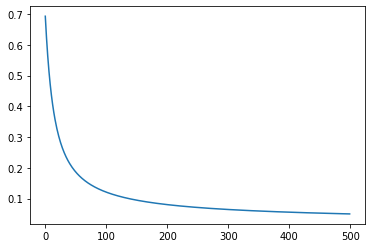

In [13]:
plt.plot(errlist)

<function matplotlib.pyplot.show(close=None, block=None)>

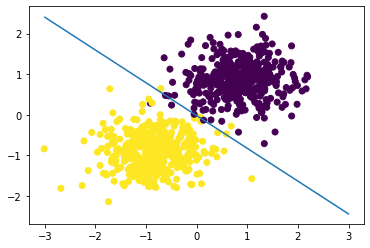

In [14]:
plt.scatter(xtr[ : ,0],xtr[ : ,1],c = ytr.reshape((-1,)))
x1 = np.arange(-3,4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.plot(x1,x2)
plt.show

In [15]:
def predict(x,theta):
    yy = hypo(x,theta)
    output = np.zeros((yy.shape))
    output[yy>=0.5] = 1
    output = output.astype('int')
    return output
xtrp = predict(xtr1,theta)

In [16]:
def acc(act,pred):
    act = act.astype('int')
    act = act.reshape((-1,1))
    ac = np.sum(act==pred)/act.shape[0]
    return ac*100

In [17]:
tac = acc(ytr,xtrp)
print(tac)

98.875
